In [119]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import cmdstanpy


In [22]:
# Task 1
gen_quant = CmdStanModel(stan_file='code_1.stan')
samples = gen_quant.sample(data={"N":50},
                           fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=0, 
                            chains = 1)



INFO:cmdstanpy:compiling stan file /home/lab3/code_1.stan to exe file /home/lab3/code_1
INFO:cmdstanpy:compiled model executable: /home/lab3/code_1
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


   lp__  accept_stat__     y     theta
0   0.0            0.0   9.0  0.220249
1   0.0            0.0   9.0  0.187693
2   0.0            0.0  10.0  0.171970
3   0.0            0.0   9.0  0.186084
4   0.0            0.0  11.0  0.211272


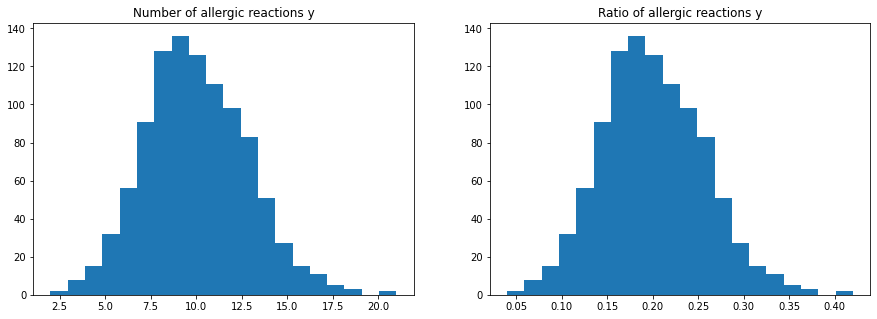

Mean of y:  9.94
Mean of ratio:  0.1988


In [24]:
df = samples.draws_pd()
print(df.head())

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].hist(df["y"], bins=20)
axs[0].set_title("Number of allergic reactions y")
ratio = df["y"]/50
axs[1].hist(ratio, bins=20)
axs[1].set_title("Ratio of allergic reactions y")
plt.show()

print("Mean of y: ", df["y"].mean())
print("Mean of ratio: ", ratio.mean())

INFO:cmdstanpy:compiling stan file /home/lab3/code_2.stan to exe file /home/lab3/code_2
INFO:cmdstanpy:compiled model executable: /home/lab3/code_2
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed


chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.



          p  y_pred
0  0.212226     6.0
1  0.226380    12.0
2  0.229048    12.0
3  0.229433    16.0
4  0.155320     8.0


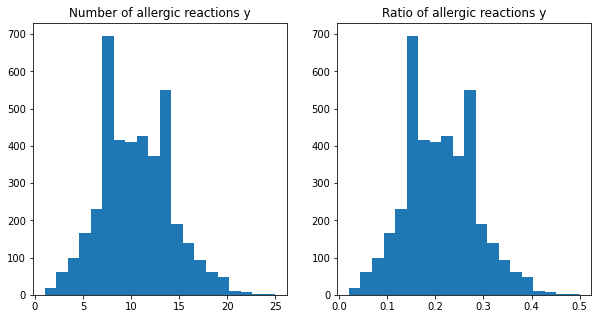

In [201]:
number_of_reactions = 10
model_posterior = CmdStanModel(stan_file='code_2.stan')
samples_posterior = model_posterior.sample(data={'N':50,
                                                 'y':number_of_reactions})

df_posterior = pd.DataFrame(samples_posterior.stan_variables())
print(df_posterior.head())
ratio_posterior = df_posterior["y_pred"]/50
fig, axs = plt.subplots(1, 2,figsize=(10, 5))
axs[0].hist(df_posterior["y_pred"], bins=20)
axs[0].set_title("Number of allergic reactions y")
axs[1].hist(ratio_posterior, bins=20)
axs[1].set_title("Ratio of allergic reactions y")
plt.show()

In [202]:
# import scipy.stats as stats

# compute 94% highest density interval (HDI) for predicted ratio
# predicted_ratio_hdi = stats.mstats.hdquantiles(ratio_posterior, prob=[0.03, 0.97])
# predicted_ratio_mean = np.mean(ratio_posterior)

ratio_summary = az.summary(ratio_posterior.to_numpy(), hdi_prob=0.94)
ratio_mean = ratio_summary['mean'][0]

ratio_hdi = az.hdi(ratio_posterior.to_numpy(), hdi_prob=0.94)
print("Mean of predicted ratio: ", ratio_mean)
print("Density interval of predicted ratio: ")
print(f" - lower: {ratio_hdi[0]}")
print(f" - upper: {ratio_hdi[1]}")

# compute 94% HDI for probability
# probability_hdi = stats.mstats.hdquantiles(df_posterior["p"], prob=[0.03, 0.97])
# probability_mean = np.mean(df_posterior["p"])

# p_summary = az.summary(df_posterior["p"].to_numpy(), hdi_prob=0.94)
# p_mean = p_summary["mean"][0]
p_mean = df_posterior["p"].mean()
p_hdi = az.hdi(df_posterior["p"].to_numpy(), hdi_prob=0.94)
print("Mean of probability: ", p_mean)
print("Density interval of probability:")
print(f" - lower: {p_hdi[0]}")
print(f" - upper: {p_hdi[1]}")

ratio_prob_lower = (ratio_posterior < p_mean).sum()/len(ratio_posterior)
print("\nProbability that ratio is lower than the average probability: ", ratio_prob_lower)


arviz - WARNING - Shape validation failed: input_shape: (1, 4000), minimum_shape: (chains=2, draws=4)


Mean of predicted ratio:  0.208
Density interval of predicted ratio: 
 - lower: 0.08
 - upper: 0.34
Mean of probability:  0.20791574615000002
Density interval of probability:
 - lower: 0.117757
 - upper: 0.293852

Probability that ratio is lower than the average probability:  0.5245
